In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import seaborn as sns
import matplotlib.pyplot as plt

import warnings                          # to ingnore the warnings 
warnings.filterwarnings('ignore')

# **Load Data**

In [3]:
df = pd.read_csv("Housing_Price_Data.csv")
df.head().T

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


**Features:**

* **price:** The price of the property.
* **area:** The total area of the property in square feet.
* **bedrooms:** The number of bedrooms in the property.
* **bathrooms:** The number of bathrooms in the property.
* **stories:** The number of stories (floors) in the property.
* **mainroad:** Indicates whether the property is located on a main road (binary: yes/no).
* **guestroom:** Indicates whether the property has a guest room (binary: yes/no).
* **basement:** Indicates whether the property has a basement (binary: yes/no).
* **hotwaterheating:** Indicates whether the property has hot water heating (binary: yes/no).
* **airconditioning:** Indicates whether the property has air conditioning (binary: yes/no).
* **parking:** The number of parking spaces available with the property.
* **prefarea:** Indicates whether the property is in a preferred area (binary: yes/no).
* **furnishingstatus:** The furnishing status of the property (e.g., furnished, semi-furnished, unfurnished).

# **Explore Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


* **DataSet has 13 distinct Features...**
* **almost half of the features are in Boolean i.e. yes/no format and remaining are in integer**

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(545, 13)

In [9]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

* **No duplicate entries are found**
* **No null values are found**

In [10]:
df.groupby('price')['area'].sum().nlargest(10)
# total ‘area’ for each unique ‘price’.

price
3500000    88001
4200000    70719
4900000    65241
5250000    62389
5600000    59096
5950000    51010
3150000    38950
8400000    36800
4690000    34187
2940000    34015
Name: area, dtype: int64

In [11]:
average_area_by_price = df.groupby('price')['area'].mean().nlargest(10)
print(average_area_by_price)

price
5943000     15600.0
10150000    12390.0
7343000     11440.0
7000000     11175.0
6930000     11040.0
9800000      9475.0
12250000     9460.0
7245000      9000.0
7980000      9000.0
8575000      8800.0
Name: area, dtype: float64


In [12]:
df["area"].value_counts()

area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64

# **Preprocessing Data**

In [13]:
#  make a copy of DataFrame
housing_df = df.copy()
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [14]:
#  price per square foot
housing_df["price_per_sqft"] = housing_df["price"] / housing_df["area"]
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.452830
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.187500
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.919679
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.666667
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.735849


In [15]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  price_per_sqft    545 non-null    float64
dtypes: float64(1), int64(6), object(7)
memory usage: 59.7+ KB


 new price_per_sqft feature with float64 datatype is added 

In [16]:
var = housing_df.select_dtypes(include = "number")
var

,price,area,bedrooms,bathrooms,stories,parking,price_per_sqft
0,13300000,7420,4,2,3,2,1792.452830
1,12250000,8960,4,4,4,3,1367.187500
2,12250000,9960,3,2,2,2,1229.919679
3,12215000,7500,4,2,2,3,1628.666667
4,11410000,7420,4,1,2,2,1537.735849
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,606.666667
541,1767150,2400,3,1,1,0,736.312500
542,1750000,3620,2,1,1,0,483.425414
543,1750000,2910,3,1,1,0,601.374570


In [17]:
correlation = var.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,price_per_sqft
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.392921
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,-0.465517
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.229549
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.283839
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.303850
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.002418
price_per_sqft,0.392921,-0.465517,0.229549,0.283839,0.303850,0.002418,1.000000


* 1 to -1, 1 to 0.7 = good positive correlation 

          * -1 to -0.7  =  good negative correlation 
          
          * -0.3 to 0.3 = bad corraltion

# **Visualization**

* **We will see the factors affecting house price in visualization.**

## Multivariate analysis

<Axes: >

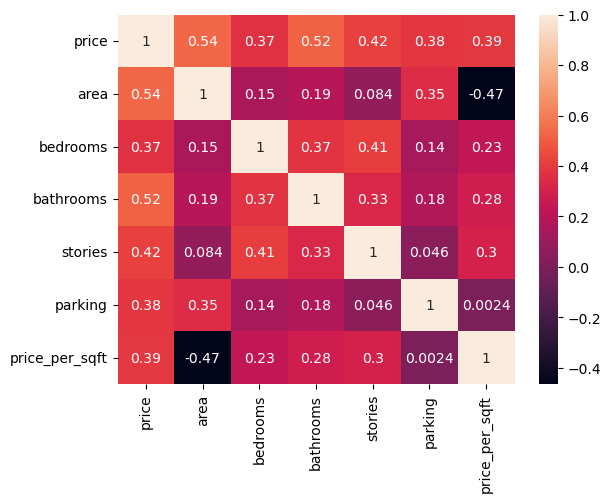

In [18]:
sns.heatmap(data = correlation,annot = True)

In [19]:
housing_df["price"].min(),housing_df["price"].max(), housing_df["price"].mean().round()

(1750000, 13300000, 4766729.0)

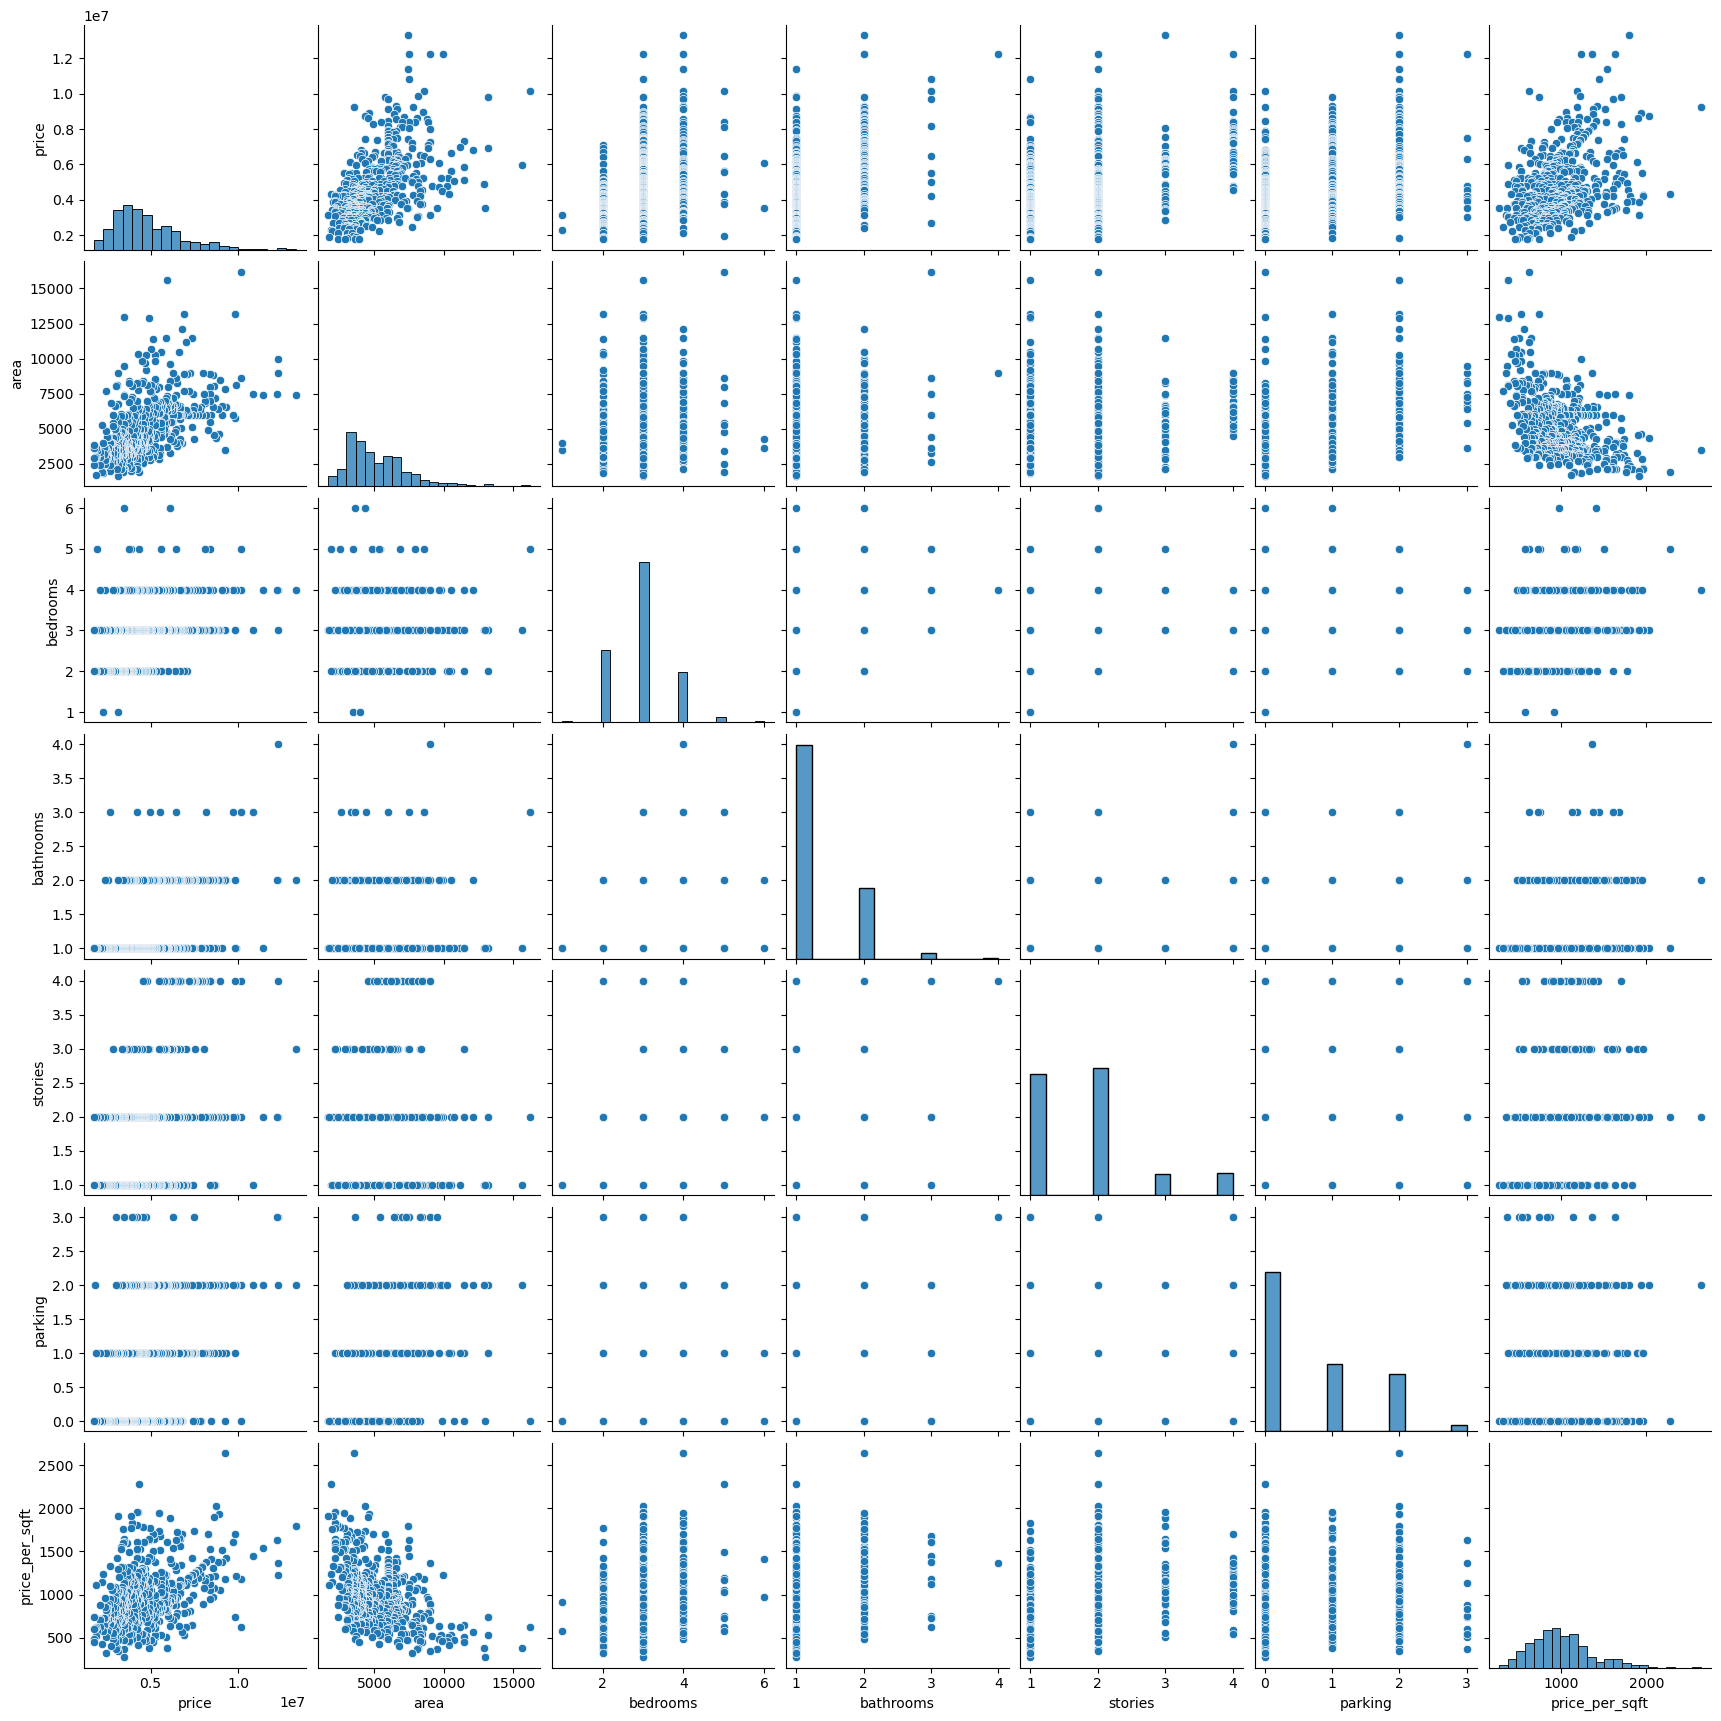

In [20]:
sns.pairplot(housing_df)

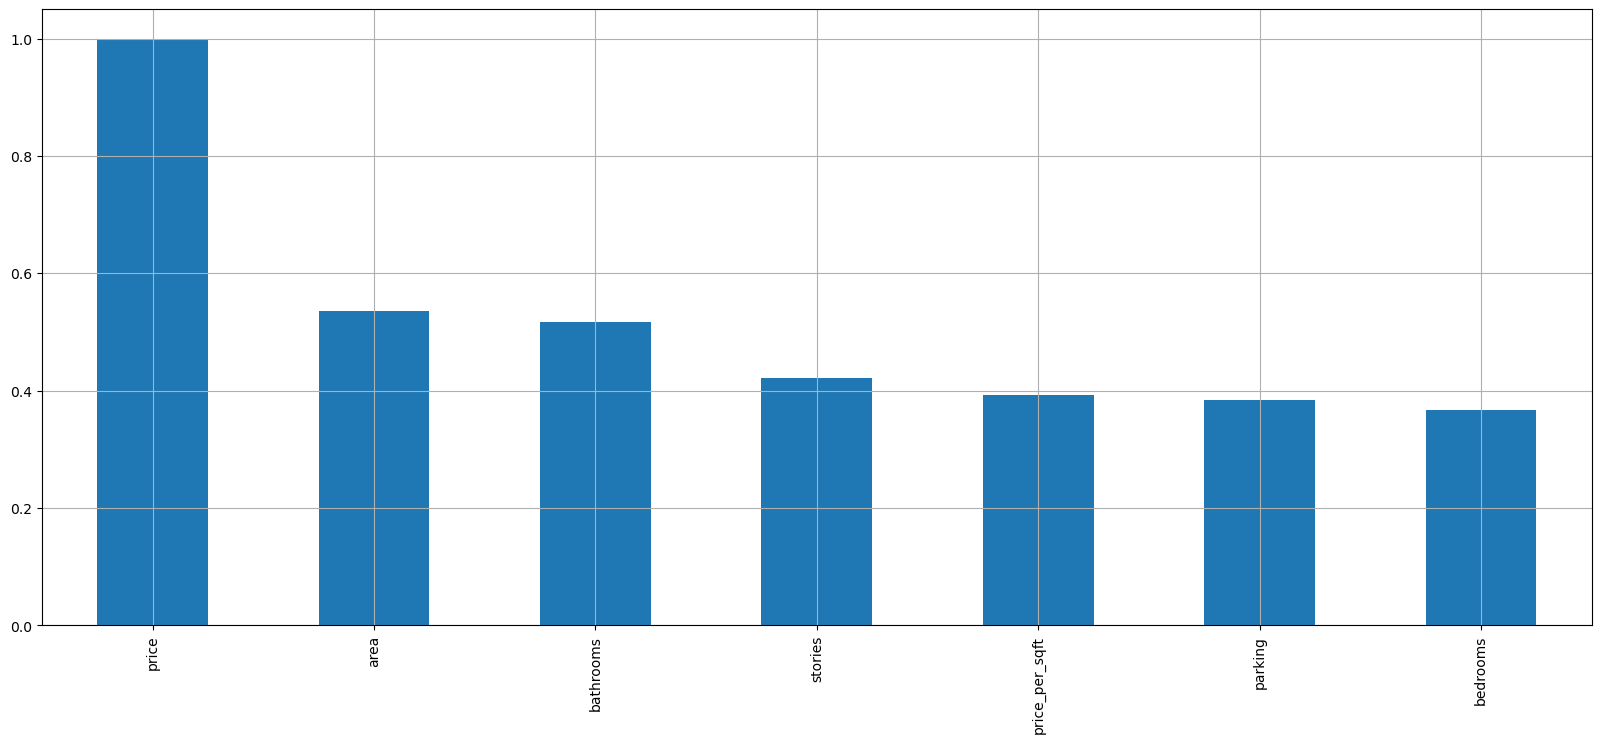

In [21]:
plt.figure(figsize=(20,8))
correlation['price'].sort_values(ascending = False).plot(kind='bar')
plt.grid(True)

* House price data ranges from 1.75 million to 13 million but the average price is around 4.7 million.
* The relationship between area and price is typically positive. This means that, generally, as the area of a property increases, the price also tends to increase
* Data shows that houses with less price has most buying.

## Bivariate analysis

<Axes: xlabel='area', ylabel='price'>

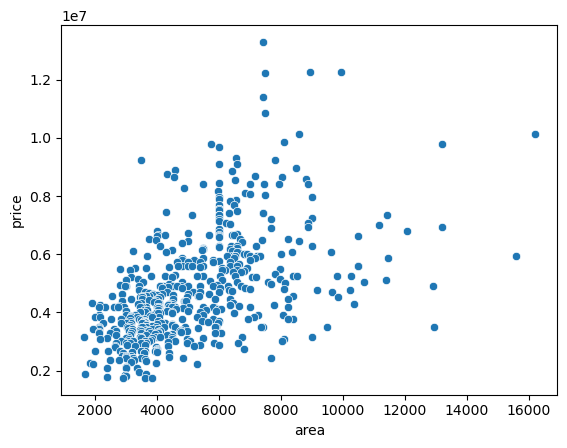

In [22]:
sns.scatterplot(x = "area", y ="price", data = df )

<Axes: xlabel='area', ylabel='price'>

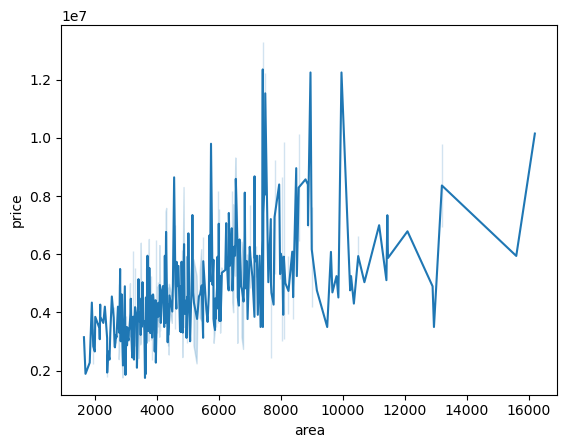

In [23]:
sns.lineplot(x = "area",y= "price", data = housing_df)

<Axes: xlabel='area', ylabel='price'>

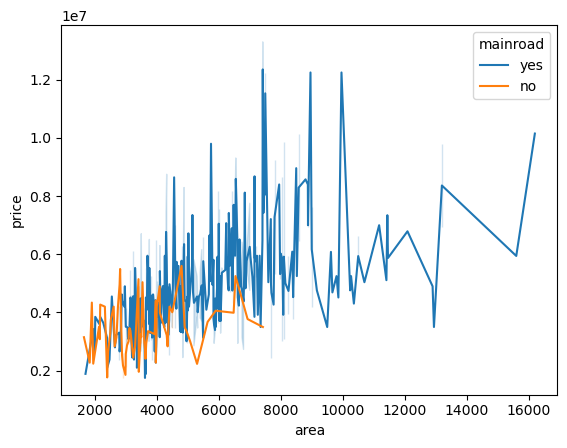

In [24]:
sns.lineplot(x = "area",y= "price", data = housing_df,hue = "mainroad")

In [25]:
bins = [0,2000,4000,6000,8000,10000,12000,14000,16000]
housing_df["area_bins"] = pd.cut(housing_df["area"],bins)
housing_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_per_sqft,area_bins
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1792.452830,"(6000, 8000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1367.187500,"(8000, 10000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1229.919679,"(8000, 10000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1628.666667,"(6000, 8000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1537.735849,"(6000, 8000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,606.666667,"(2000, 4000]"
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,736.312500,"(2000, 4000]"
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,483.425414,"(2000, 4000]"
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished,601.374570,"(2000, 4000]"


In [26]:
housing_df["area_bins"].value_counts()

area_bins
(2000, 4000]      200
(4000, 6000]      181
(6000, 8000]      104
(8000, 10000]      35
(10000, 12000]     11
(0, 2000]           7
(12000, 14000]      5
(14000, 16000]      1
Name: count, dtype: int64

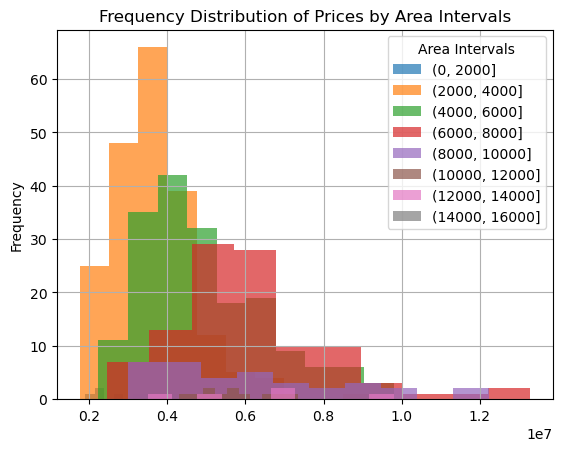

In [27]:
housing_df.groupby('area_bins')['price'].plot(kind='hist', alpha=0.7)
# plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Prices by Area Intervals')
plt.legend(title='Area Intervals')
plt.grid(True)
plt.show()

* We have more data between 2000 to 8000 sqft.
* houses which are less than 8000sqft are more popular hence they get more price..or they become more expensive as they have high demand.

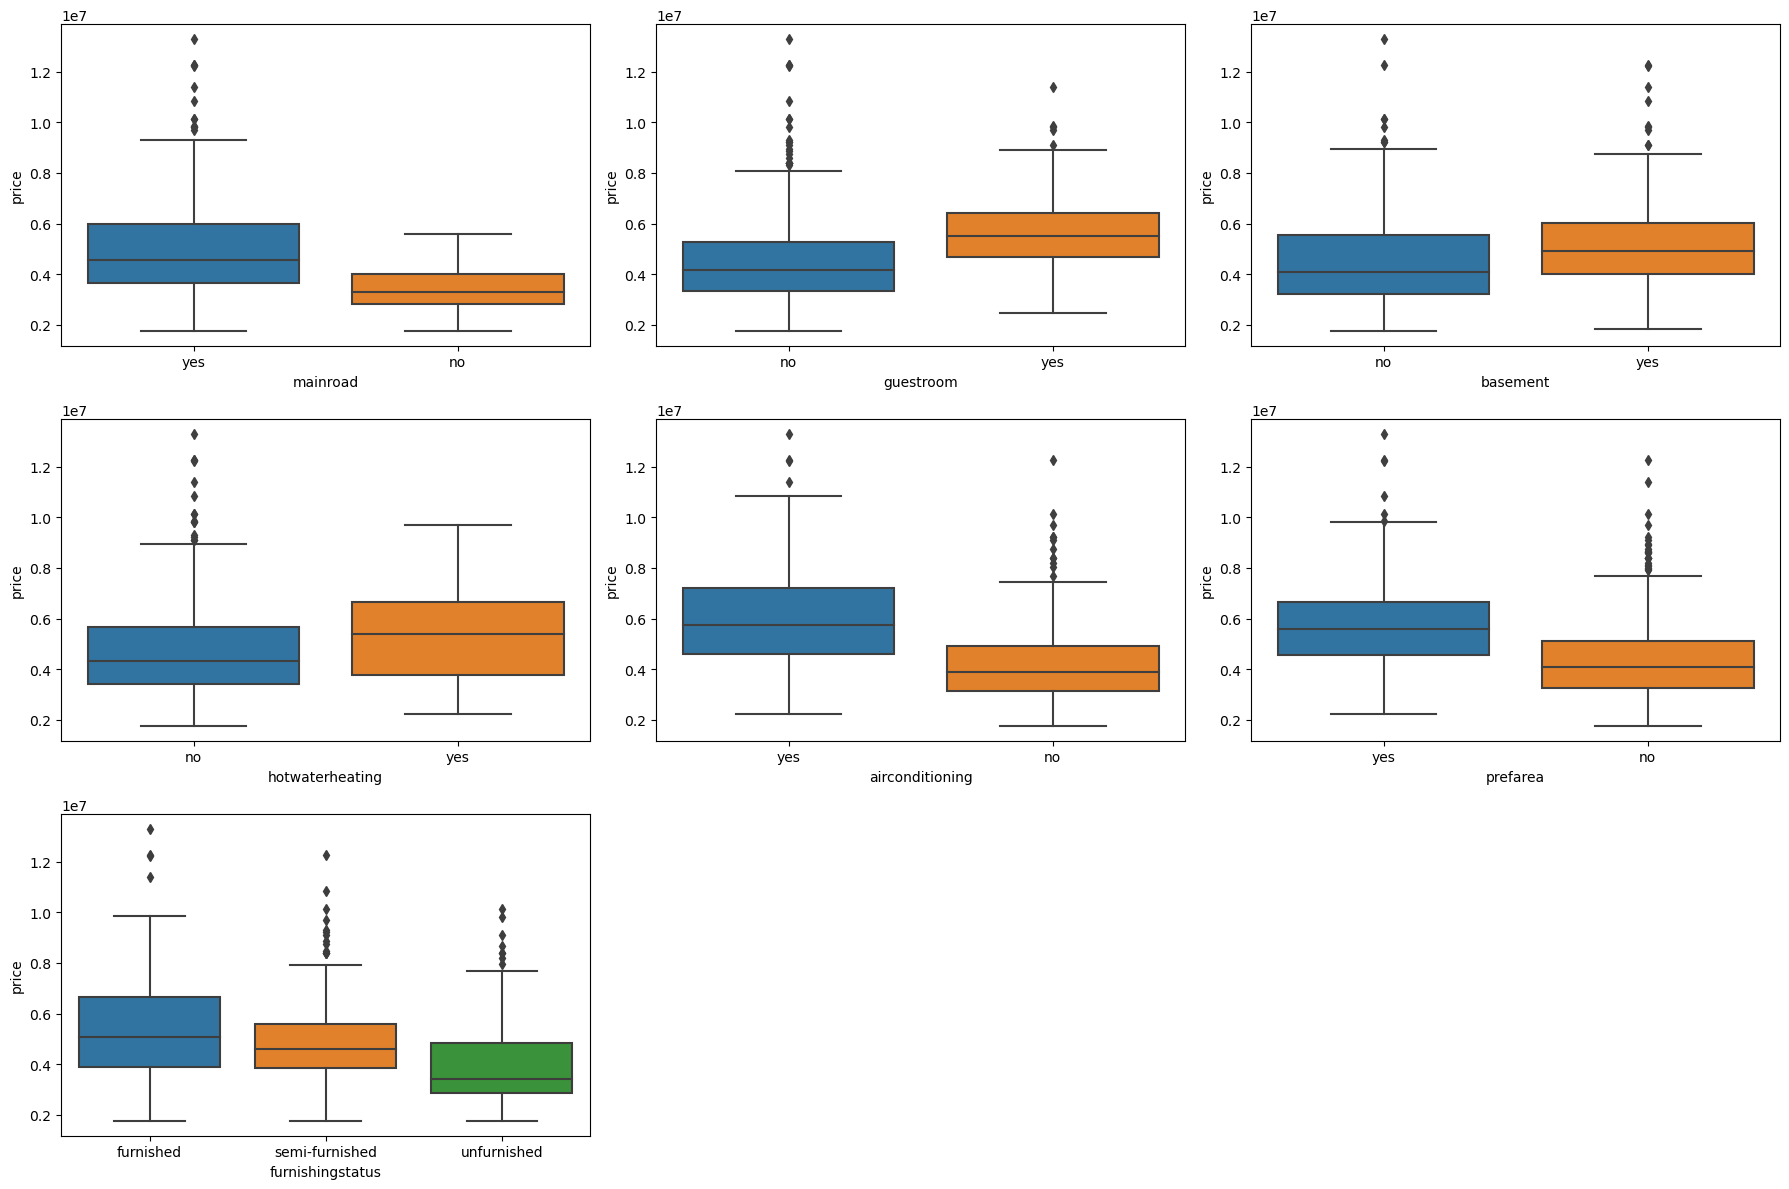

In [28]:
categorical_col = housing_df.select_dtypes(include="object")

plt.figure(figsize=(18,12))
for i , feature in enumerate(categorical_col,1):
    plt.subplot(3,3,i)
    sns.boxplot(x=housing_df[feature],y = housing_df["price"])
    plt.tight_layout()

plt.show()


* There are some other features also which are affecting prices of the houses.
* we can see many outlies in the data.

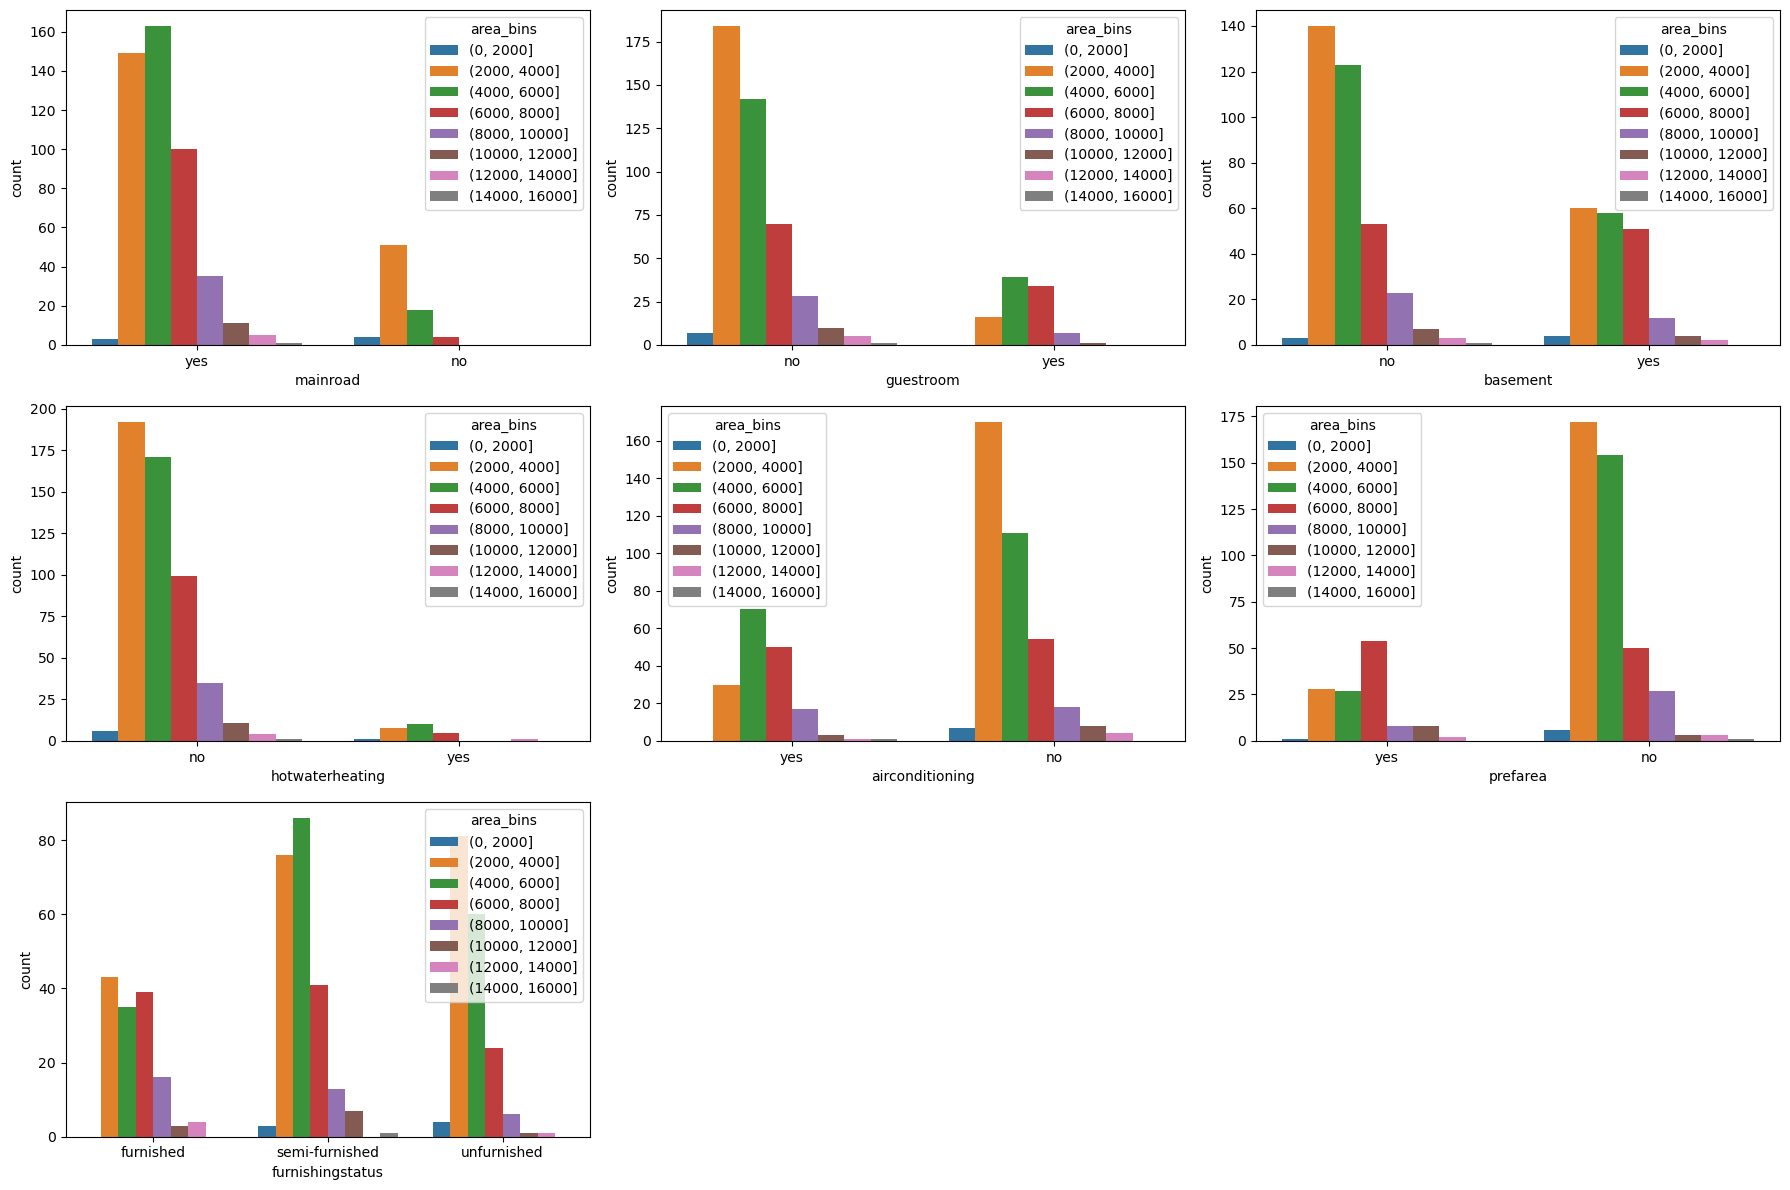

In [29]:


plt.figure(figsize=(18,12))
for i , feature in enumerate(categorical_col,1):
    plt.subplot(3,3,i)
    sns.countplot(x=housing_df[feature],hue = housing_df["area_bins"])
    plt.tight_layout()

plt.show()


## Univariate Analysis

<Axes: xlabel='price', ylabel='Density'>

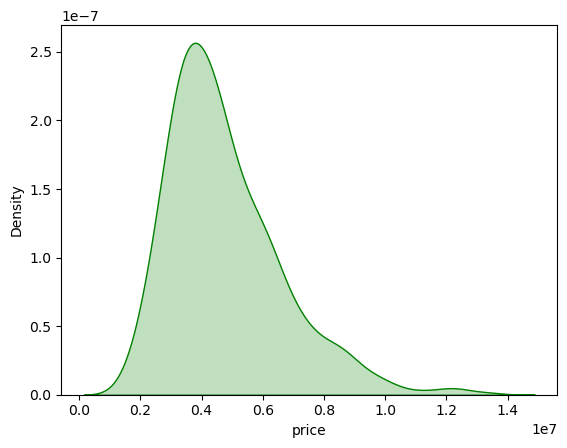

In [30]:

sns.kdeplot(housing_df["price"], fill = True , color = "Green")

In [31]:
housing_df["price"].skew()

1.2122388370279802

In [32]:
housing_df["price"].mode(),housing_df["price"].median(),housing_df["price"].mean().round()

(0    3500000
 1    4200000
 Name: price, dtype: int64,
 4340000.0,
 4766729.0)

* Skew means spread of data.spread of data means which data is in less proportion, which data  is in moderete proportion and which data is in large proportion

>> It is a measure of symmetry/asymmetry of data distribution
>> How much our probability distribution curve varies from normal distrubution curve

Postive skewness(Right skew) - Tail of distribution is longer towards right hand side (left side data is more)
Negative skewness(Left skew) - Tail of distribution is longer towards left hand side  (right side data is more)

-0.5 to +0.5 >> Symmetrical distribution/noraml distribuation


-1 to -0.5 >> Negative skewed distribution
-1 > skew  >> Highly negative skewed distribution (-1.2,-1.5)

0.5 to 1.0 >> Positive skewed distribution
skew > 1.0 >> Highly positive skewed distribtion(1.3,1.6)

* Ideally skew value should be zero

* Price distribution is positive skewed[1.21].(skew > 1)
    - It means Tail of distribution is longer toward right hand side... which is also means left hand side has more data.
    - Also in that case Mode<Median<Mean.[3500000<4200000<4766729.0]

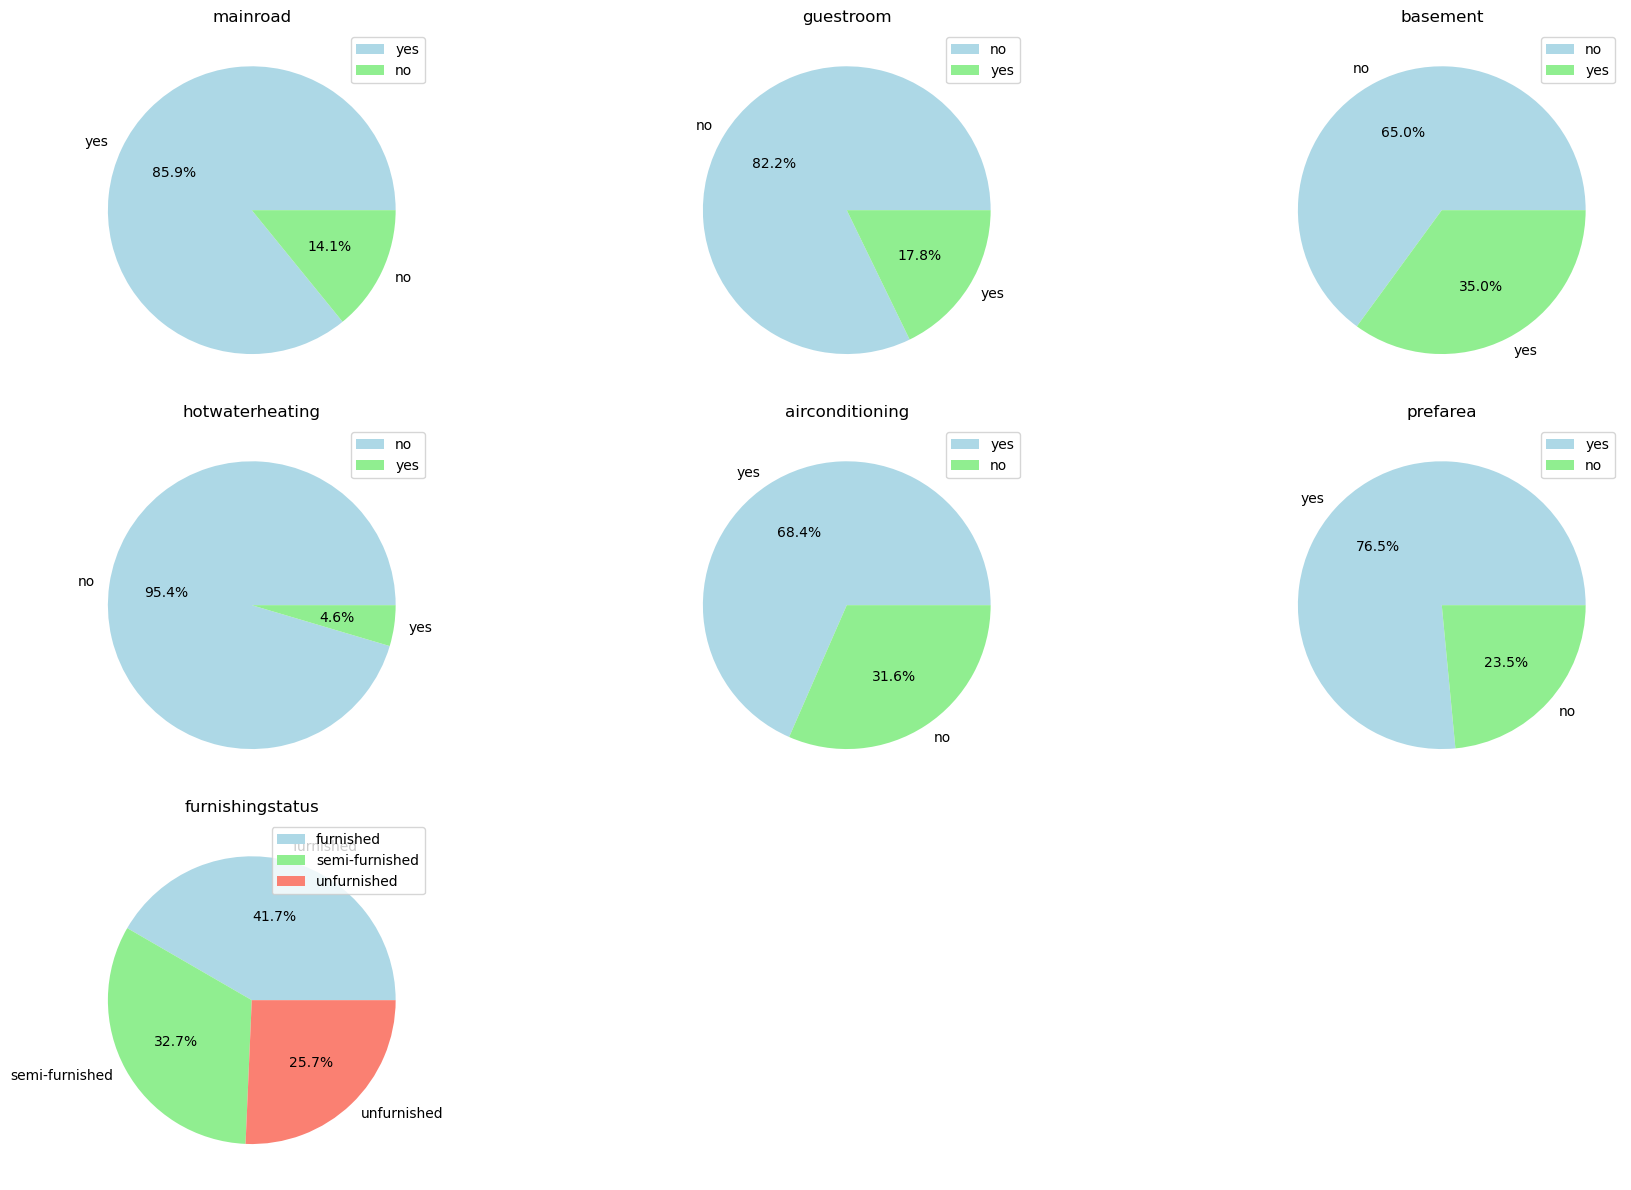

In [42]:
plt.figure(figsize=(18,12))
for i , feature in enumerate(categorical_col,1):
    plt.subplot(3,3,i)
    plt.pie(x=housing_df[feature].value_counts(),labels = housing_df[feature].unique(), 
            autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
    plt.legend(housing_df[feature].unique())
    plt.title(housing_df[feature].name)
    plt.tight_layout()

plt.show()

In [43]:
var

,price,area,bedrooms,bathrooms,stories,parking,price_per_sqft
0,13300000,7420,4,2,3,2,1792.452830
1,12250000,8960,4,4,4,3,1367.187500
2,12250000,9960,3,2,2,2,1229.919679
3,12215000,7500,4,2,2,3,1628.666667
4,11410000,7420,4,1,2,2,1537.735849
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,606.666667
541,1767150,2400,3,1,1,0,736.312500
542,1750000,3620,2,1,1,0,483.425414
543,1750000,2910,3,1,1,0,601.374570


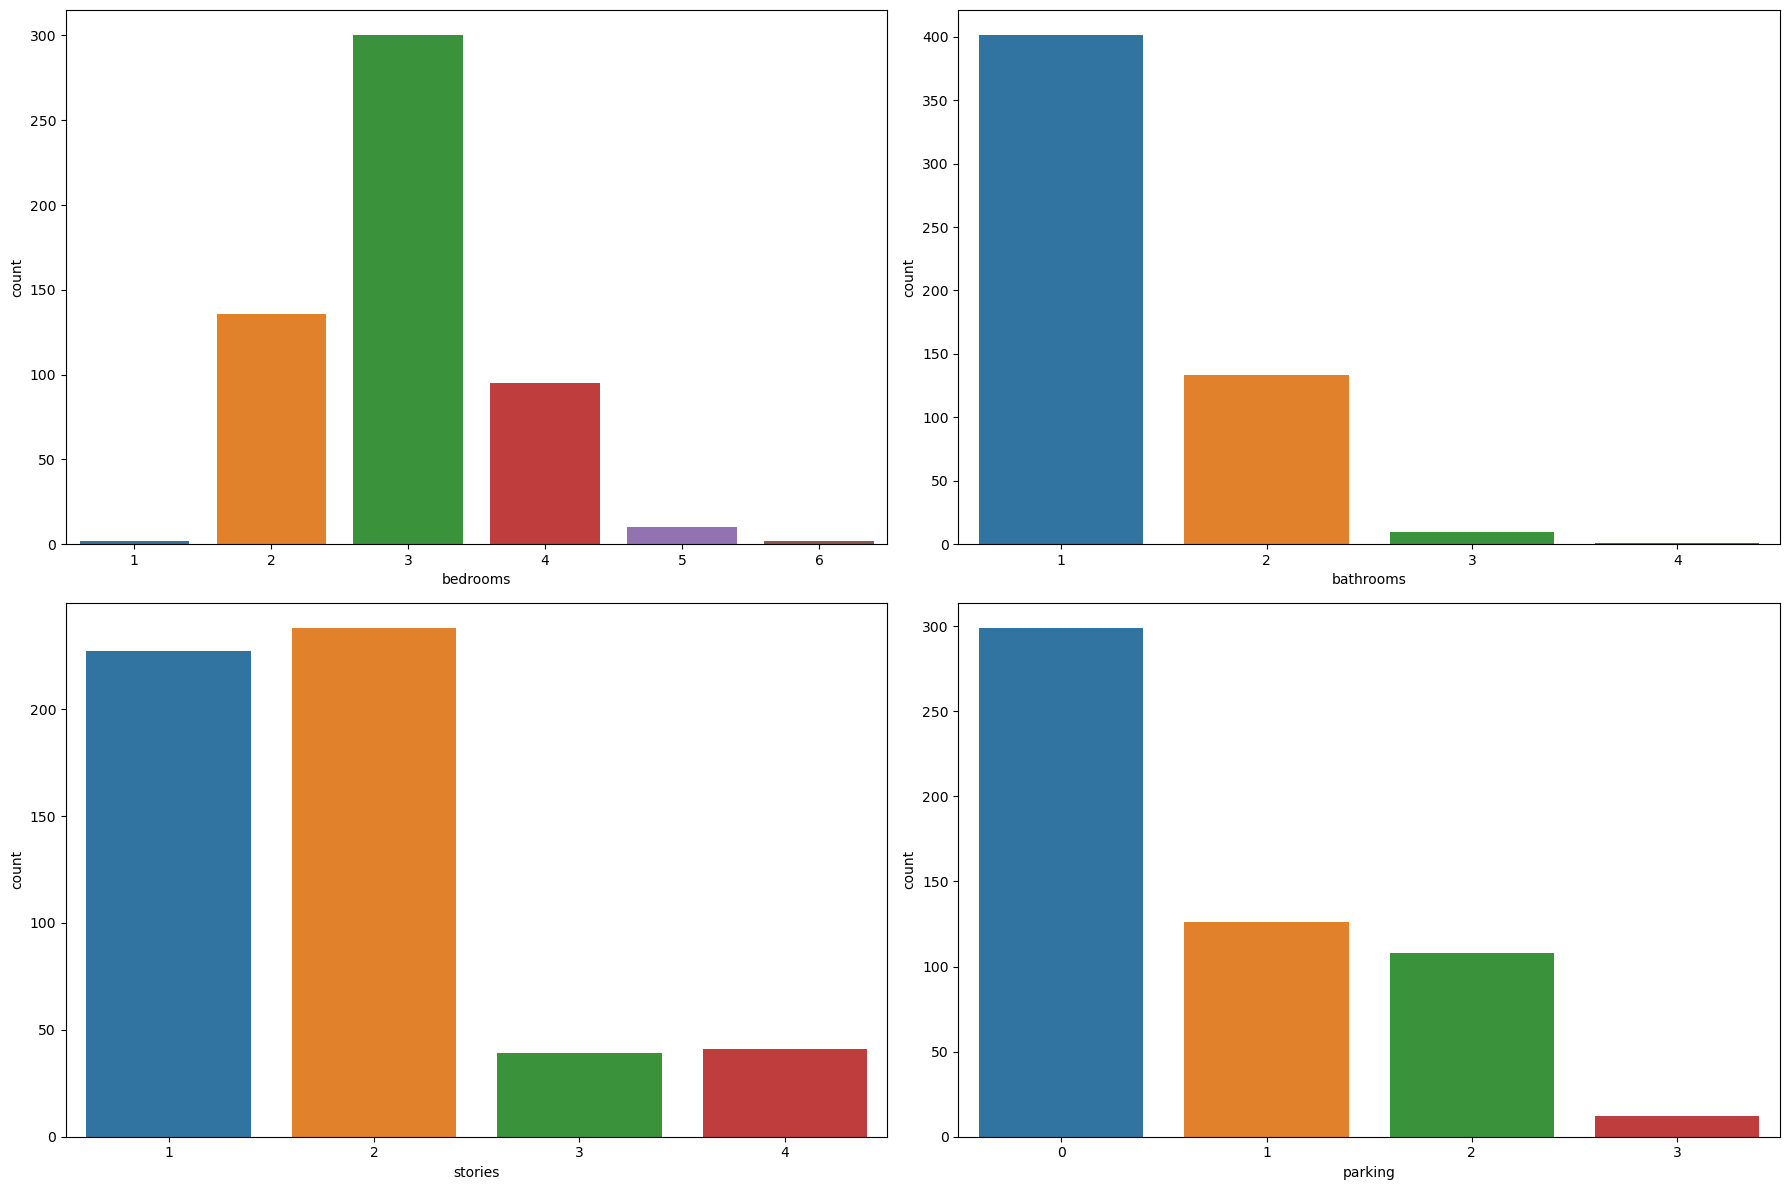

In [44]:
plt.figure(figsize=(18,12))
for i , feature in enumerate(["bedrooms","bathrooms","stories","parking"],1):
    plt.subplot(2,2,i)
    sns.countplot(x=housing_df[feature])
    plt.tight_layout()

plt.show()

* **Number of Bedrooms and Bathrooms:**

*     Most properties have 2 or 3 bedrooms and 1 or 2 bathrooms.
*     There are also properties with 4 or 5 bedrooms and 3 or 4 bathrooms, although they are less common.

* **Number of Stories:**

*     The number of stories in properties varies, with most having either 1 or 2 stories.

* **Parking Options:**

*     A significant portion of properties have no parking space for Vehicals.
*     Some properties have parking space for 1 or 2 car, property with 3 parking spaces are uncommon .

* **Furnishing Status:**

*     Furnishing status varies among properties, with some being fully furnished, semi-furnished, or unfurnished.
*     The majority of properties seem to be furnished or semi-furnished.

* **Preferences:**

*     There is a preference for properties located near the main road, with many having this feature.
*     Guestroom availability and hot water heating are less common features.
*     Air conditioning is a desirable feature, with a significant portion of properties having it.
*     Preference area (Prefarea) varies among properties, with some having a preferred area and others not.